In [1]:
# !pip install -U datasets huggingface_hub fsspec

In [122]:
# import torch
# import torch.nn as nn
import pandas as pd
import json
import os
import matplotlib.pyplot as plt

Thrust curve data was collected from thrustcurve.org
- API address: https://www.thrustcurve.org/api/v1
- Info about the API, schema and metadata, and Terms of Service: https://www.thrustcurve.org/info/api.html

In [123]:
work_dir = os.getcwd()
data_dir = work_dir.replace("GitHub/RocketPill/ipynb-notebooks", "Data/")
thrust_curves_data_path = data_dir + "thrust_curves_normalized.csv"
models_path = work_dir.replace("GitHub/RocketPill/ipynb-notebooks", "Deep_Learning_Models/") 
thrust_curves_data_file_name_pattern = f"thrust_curves_normalized"

In [124]:
print(f'work_dir: {work_dir}')
print(f'data_dir: {data_dir}')
print(f'models_path: {models_path}')

work_dir: /Users/rckyi/Documents/GitHub/RocketPill/ipynb-notebooks
data_dir: /Users/rckyi/Documents/Data/
models_path: /Users/rckyi/Documents/Deep_Learning_Models/


In [125]:
# work_dir = os.getcwd()
# data_dir = os.getcwd().replace("GitHub/RocketPill/ipynb-notebooks", "Data/")
# thrust_curves_files_id = "thrust_curves_normalized.csv"
# models_path = os.getcwd().replace("GitHub/RocketPill/ipynb-notebooks", "Deep_Learning_Models/") 

In [126]:
ls = [data_dir + x for x in os.listdir(data_dir) if thrust_curves_data_file_name_pattern in x ]

In [127]:
lsf = [ pd.read_csv(f) for f in ls]
df = pd.concat(lsf)

In [138]:
df.head()

,time,thrust,motorId,motor_name,impulse_class
0,0.000000,0.000000,5f4294d200023100000000f7,J245-BG,J
1,0.000000,1.000000,5f4294d200023100000000f7,J245-BG,J
2,0.053367,0.800001,5f4294d200023100000000f7,J245-BG,J
3,0.401317,0.692308,5f4294d200023100000000f7,J245-BG,J
4,0.787695,0.415384,5f4294d200023100000000f7,J245-BG,J


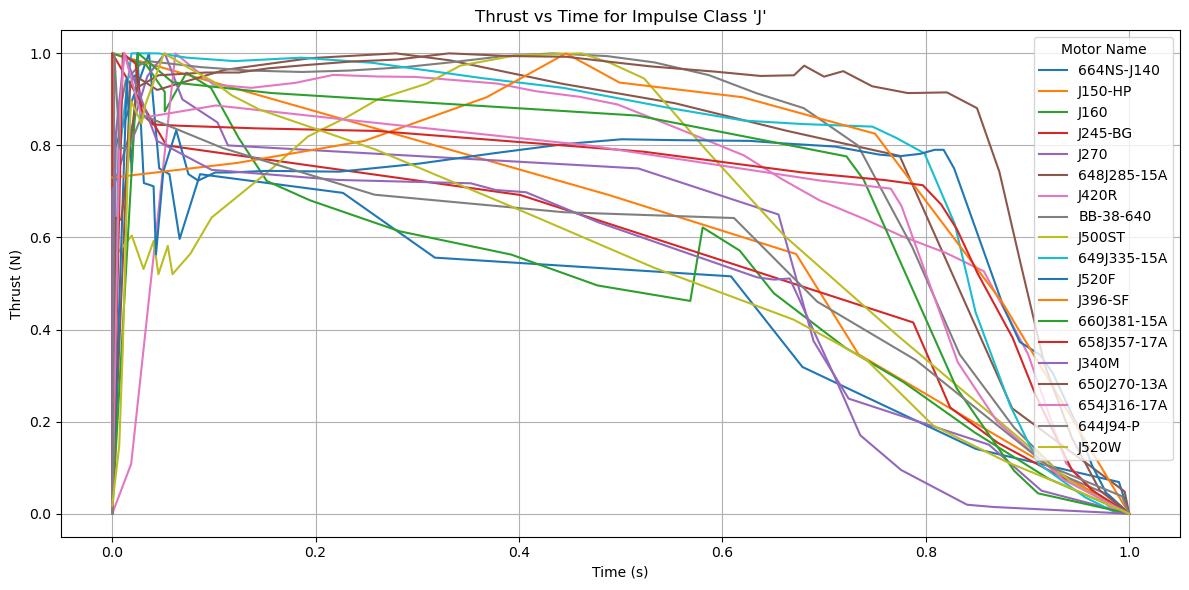

In [129]:
import pandas as pd


# Assume your DataFrame is named df
# Filter for impulse_class 'J'
df_j = df[df['impulse_class'] == 'J']

# Sort by time for proper plotting
df_j = df_j.sort_values(by='time')

# Plot
plt.figure(figsize=(12, 6))

# Group by motorId to label segments
for motor_id, group in df_j.groupby('motorId'):
    plt.plot(group['time'], group['thrust'], label=group['motor_name'].iloc[0])

plt.title("Thrust vs Time for Impulse Class 'J'")
plt.xlabel("Time (s)")
plt.ylabel("Thrust (N)")
plt.legend(title="Motor Name")
plt.grid(True)
plt.tight_layout()
plt.show()


In [134]:
# import pandas as pd


# # Assume your DataFrame is named df
# # Filter for impulse_class 'J'
# df_j = df[df['impulse_class'] == 'J']

# # Sort by time for proper plotting
# df_j = df_j.sort_values(by='time')

# # Plot
# plt.figure(figsize=(12, 6))

# # Group by motorId to label segments
# for motor_id, group in df_j.groupby('motorId'):
#     plt.plot(group['time'], group['thrust'], label=group['motor_name'].iloc[0])

# plt.title("Thrust vs Time for Impulse Class 'F'")
# plt.xlabel("Time (s)")
# plt.ylabel("Thrust (N)")
# plt.legend(title="Motor Name")
# plt.grid(True)
# plt.tight_layout()
# plt.savefig(data_dir + 'thrust_curve_examples.png')
# plt.show()

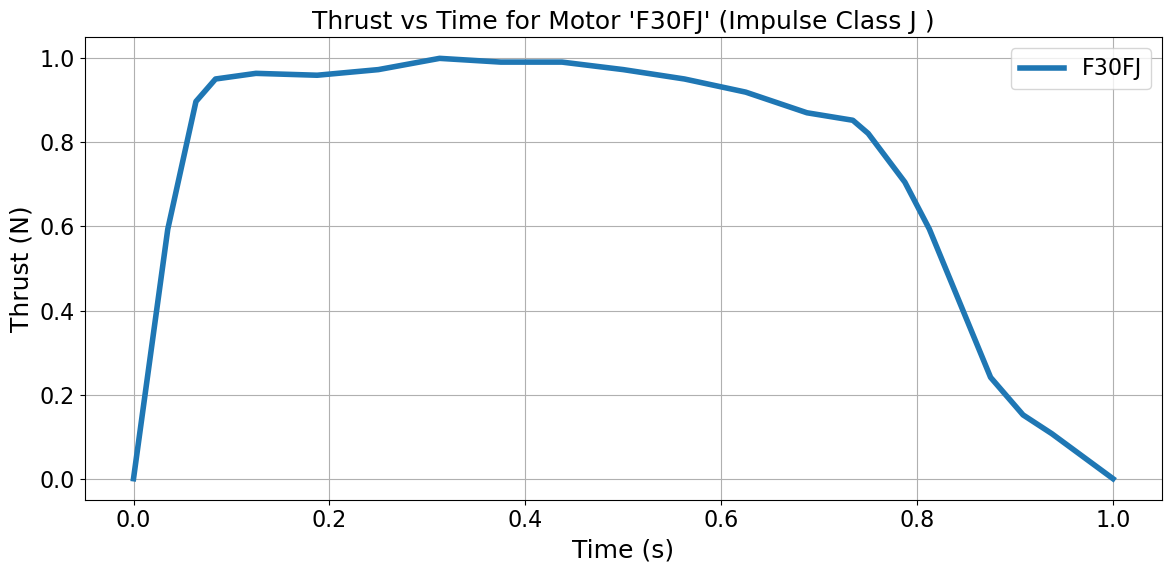

In [174]:
import pandas as pd
import matplotlib.pyplot as plt

plot_motor_name = 'F30FJ'
# Filter for impulse_class 'J' and motor_name '664NS-J140'
filtered_df = df[
    # (df['impulse_class'] == 'J') 
    # & 
(df['motor_name'] == plot_motor_name)
]

plot_impulse_class = df.iloc[i, (df[df['motor_name']== plot_motor_name]).columns.get_loc('impulse_class')]

# Sort by time for proper plotting
filtered_df = filtered_df.sort_values(by='time')

# Plot

plt.rcParams['font.size'] = 16 # Sets the default font size to 12
plt.rcParams['axes.labelsize'] = 18 # Sets the font size of axis labels
plt.rcParams['axes.titlesize'] = 18 # Sets the font size of axis titles
plt.figure(figsize=(12, 6))

plt.plot(filtered_df['time'], filtered_df['thrust'], label=plot_motor_name, linewidth=4)

plt.title(f"Thrust vs Time for Motor '{plot_motor_name}' (Impulse Class {plot_impulse_class} )")
plt.xlabel("Time (s)")
plt.ylabel("Thrust (N)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.legend(fontsize=16)
plt.savefig(data_dir + 'thrust_curve_example.png')
plt.show()

'Each' Thrust curve represents a launch+flight

In [139]:
df[0:50]

,time,thrust,motorId,motor_name,impulse_class
0,0.000000,0.000000,5f4294d200023100000000f7,J245-BG,J
1,0.000000,1.000000,5f4294d200023100000000f7,J245-BG,J
2,0.053367,0.800001,5f4294d200023100000000f7,J245-BG,J
3,0.401317,0.692308,5f4294d200023100000000f7,J245-BG,J
4,0.787695,0.415384,5f4294d200023100000000f7,J245-BG,J
5,0.823985,0.230769,5f4294d200023100000000f7,J245-BG,J
6,0.870947,0.153846,5f4294d200023100000000f7,J245-BG,J
7,1.000000,0.000000,5f4294d200023100000000f7,J245-BG,J
8,0.000000,0.000000,5f4294d20002310000000416,644J94-P,J
9,0.000722,0.115490,5f4294d20002310000000416,644J94-P,J


# Group by motor_name and compute the maximum thrust for each group

In [175]:

# max_thrust_per_motor = df.groupby('motor_name')['thrust'].max().reset_index()

# # Sort by thrust (optional, for cleaner visualization)
# max_thrust_per_motor = max_thrust_per_motor.sort_values(by='thrust', ascending=False)

# # Plot as bar chart
# plt.figure(figsize=(12, 6))
# plt.bar(max_thrust_per_motor['motor_name'], max_thrust_per_motor['thrust'], color='skyblue')

# plt.title('Maximum Thrust per Motor')
# plt.xlabel('Motor Name')
# plt.ylabel('Maximum Thrust (N)')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.grid(axis='y')
# plt.show()


In [15]:
time_windows = []
thrust_windows = []
motor_name_windows = []
impulse_class_windows = []

# start_indices = []
curr_window_time = []
curr_window_thrust = []
curr_window_motor_name = []
curr_window_impulse_class = []


for i in range(len(df)):
    t0 = df.iloc[i, df.columns.get_loc('time')]
    thrust = df.iloc[i, df.columns.get_loc('thrust')]
    motor_name = df.iloc[i, df.columns.get_loc('motor_name')]
    impulse_class = df.iloc[i, df.columns.get_loc('impulse_class')]
    # print(f't0 {type(t0)}')
    if t0 == 0.0:
        curr_window_time = []
        curr_window_thrust = []
        curr_window_motor_name = []
        curr_window_impulse_class = []
    elif t0 > 0.0 and t0 < 1.0:
        curr_window_time.append(t0)
        curr_window_thrust.append(thrust)
        curr_window_motor_name.append(motor_name)
        curr_window_impulse_class.append(impulse_class)
    elif t0 == 1.0:
        curr_window_time.append(t0)
        curr_window_thrust.append(thrust)
        curr_window_motor_name.append(motor_name)
        curr_window_impulse_class.append(impulse_class)
        
        time_windows.append(curr_window_time)
        thrust_windows.append(curr_window_thrust)
        motor_name_windows.append(curr_window_motor_name)
        impulse_class_windows.append(curr_window_impulse_class)
        
   


In [176]:
# tdf = pd.DataFrame({'time_window': time_windows})
# tdf.head()

In [151]:
window_df = pd.DataFrame({
                            'time': time_windows
                          , 'thrust_curve': thrust_windows
                          , 'motor_name': motor_name_windows
                          , 'impulse_class': impulse_class_windows
                        })

In [152]:
window_df['item_id'] = window_df.index

In [153]:
window_df.head()

,time,thrust_curve,motor_name,impulse_class,item_id
0,"[0.0533667938931297, 0.4013167938931297, 0.787...","[0.800000899236099, 0.6923083840277684, 0.4153...","[J245-BG, J245-BG, J245-BG, J245-BG, J245-BG, ...","[J, J, J, J, J, J]",0
1,"[0.0007217090069284, 0.0020207852193995, 0.007...","[0.1154904355869691, 1.0, 0.7943680846269703, ...","[644J94-P, 644J94-P, 644J94-P, 644J94-P, 644J9...","[J, J, J, J, J, J, J, J, J, J, J, J, J, J]",1
2,"[0.0143426294820717, 0.0191235059760956, 0.024...","[0.9454233664183034, 0.7429588165385054, 1.0, ...","[J520F, J520F, J520F, J520F, J520F, J520F, J52...","[J, J, J, J, J, J, J, J, J, J, J, J, J, J, J, ...",2
3,"[0.0176991150442477, 0.0221238938053097, 0.035...","[0.9351405513730164, 0.9520392135622596, 0.933...","[648J285-15A, 648J285-15A, 648J285-15A, 648J28...","[J, J, J, J, J, J, J, J, J, J, J, J, J, J, J]",3
4,"[0.0344827586206896, 0.0517241379310344, 0.068...","[0.9500113301608882, 1.0, 0.9, 0.8500113301608...","[J270, J270, J270, J270, J270, J270, J270, J27...","[J, J, J, J, J, J, J, J, J, J, J, J]",4


In [154]:
window_df['motor_name'] = window_df['motor_name'].str.get(0) 

In [155]:
window_df['impulse_class'] = window_df['impulse_class'].str.get(0) 

In [156]:
window_df.head()

,time,thrust_curve,motor_name,impulse_class,item_id
0,"[0.0533667938931297, 0.4013167938931297, 0.787...","[0.800000899236099, 0.6923083840277684, 0.4153...",J245-BG,J,0
1,"[0.0007217090069284, 0.0020207852193995, 0.007...","[0.1154904355869691, 1.0, 0.7943680846269703, ...",644J94-P,J,1
2,"[0.0143426294820717, 0.0191235059760956, 0.024...","[0.9454233664183034, 0.7429588165385054, 1.0, ...",J520F,J,2
3,"[0.0176991150442477, 0.0221238938053097, 0.035...","[0.9351405513730164, 0.9520392135622596, 0.933...",648J285-15A,J,3
4,"[0.0344827586206896, 0.0517241379310344, 0.068...","[0.9500113301608882, 1.0, 0.9, 0.8500113301608...",J270,J,4


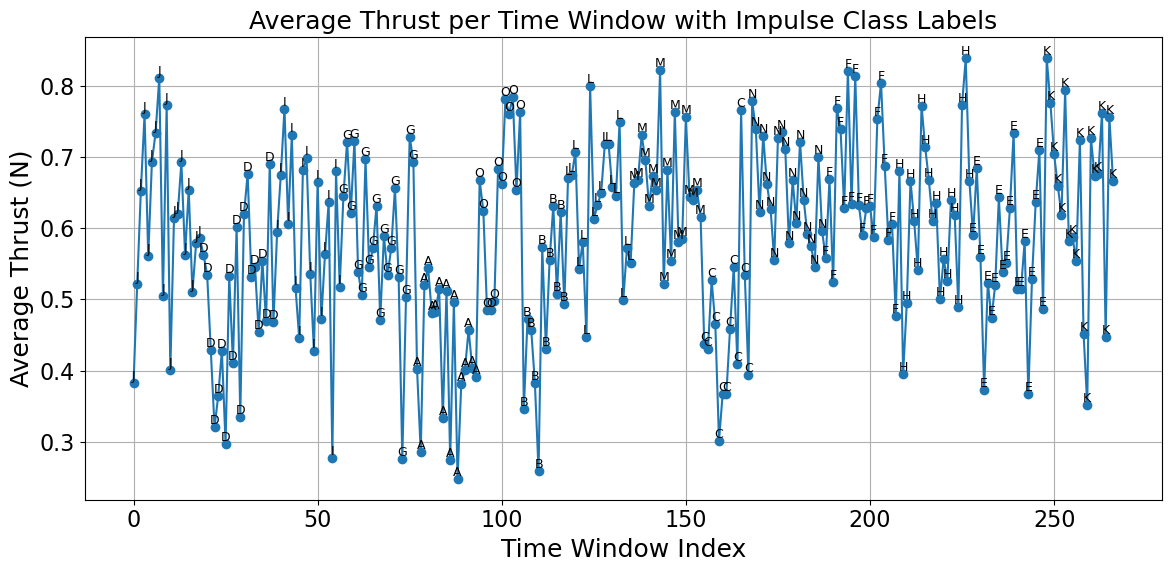

In [157]:

# Compute average thrust
window_df['avg_thrust'] = window_df['thrust_curve'].apply(lambda thrust_list: sum(thrust_list) / len(thrust_list) )

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(window_df.index, window_df['avg_thrust'], marker='o', linestyle='-', label='Avg Thrust')

# Annotate each point with impulse_class
for i, row in window_df.iterrows():
    plt.text(i, row['avg_thrust'], row['impulse_class'], ha='center', va='bottom', fontsize=9)

plt.title('Average Thrust per Time Window with Impulse Class Labels')
plt.xlabel('Time Window Index')
plt.ylabel('Average Thrust (N)')
plt.grid(True)
plt.tight_layout()
plt.show()


Bias and Representation? Are any specific motor impulse classes over-represented in the dataset that may skew modeling?

Include impulse classes in the Time Series modeling to account for that

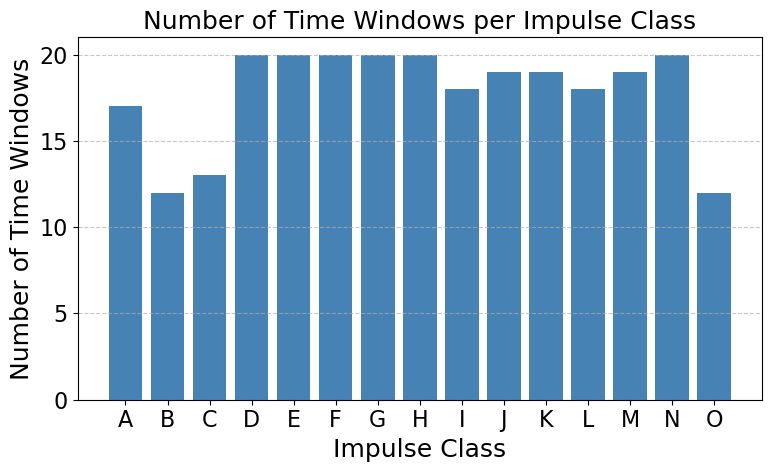

In [158]:
# Count occurrences of each impulse_class
impulse_class_counts = window_df['impulse_class'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(impulse_class_counts.index, impulse_class_counts.values, color='steelblue')

plt.title('Number of Time Windows per Impulse Class')
plt.xlabel('Impulse Class')
plt.ylabel('Number of Time Windows')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [196]:
# # Count occurrences of each motor_name
# motor_counts = df['motor_name'].value_counts().sort_values(ascending=False)

# # Plotting
# plt.figure(figsize=(12, 6))
# plt.bar(motor_counts.index, motor_counts.values, color='mediumseagreen')

# plt.title('Number of Time Windows per Motor Name')
# plt.xlabel('Motor Name')
# plt.ylabel('Number of Time Windows')
# plt.xticks(rotation=45, ha='right')
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.tight_layout()
# plt.show()


255


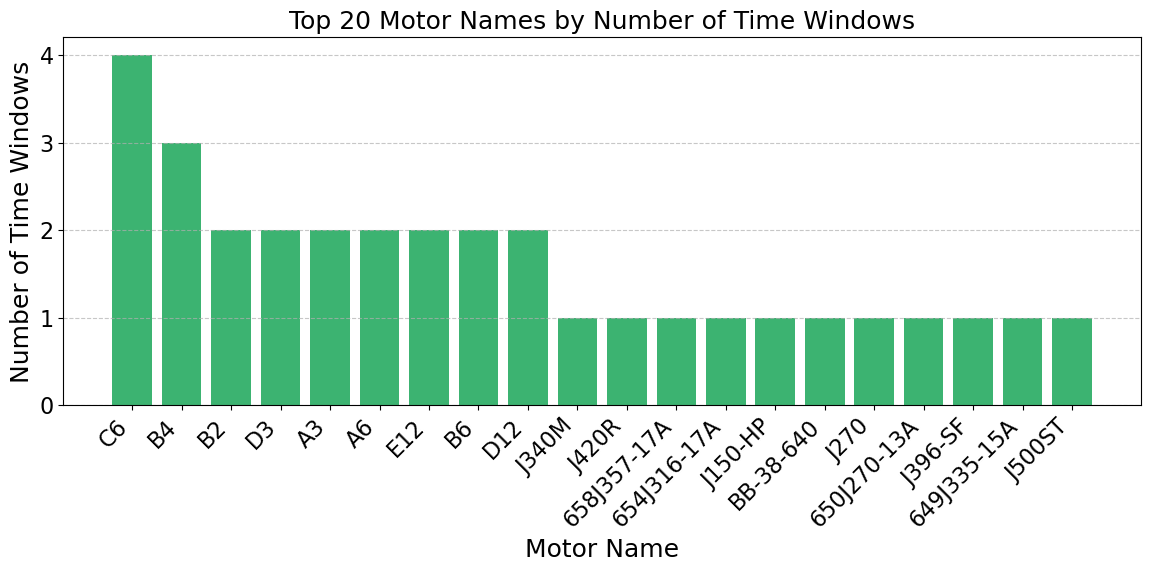

In [194]:
# Count occurrences and select top 20 motor names
unique_values = window_df['motor_name'].unique()

top_motor_counts = window_df['motor_name'].value_counts().sort_values(ascending=False).head(20)

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(top_motor_counts.index, top_motor_counts.values, color='mediumseagreen')

plt.title('Top 20 Motor Names by Number of Time Windows')
plt.xlabel('Motor Name')
plt.ylabel('Number of Time Windows')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#################

# Data pre-processing for Time Series Modeling (for Simulations) 

In [163]:
window_df.columns

Index(['time', 'thrust_curve', 'motor_name', 'impulse_class', 'item_id',
       'avg_thrust', 'start'],
      dtype='object')

In [165]:
hf_df = window_df.rename(columns={'time':'feat_dynamic_real', 'thrust_curve':'target', 'impulse_class':'feat_static_cat'})

In [172]:
hf_df.drop(columns=['avg_thrust'], axis=1, inplace=True)
hf_df.drop(columns=['motor_name'], axis=1, inplace=True)

In [173]:
hf_df.columns

Index(['feat_dynamic_real', 'target', 'feat_static_cat', 'item_id', 'start'], dtype='object')

In [ ]:
# dict_keys(['start', 'target', 'feat_static_cat', 'feat_dynamic_real', 'item_id'])

In [177]:
import datetime
dates = pd.date_range(start='2024-01-01 00:00:00', periods=len(hf_df), freq='D')
hf_df['start'] = dates.astype(str)

In [179]:
hf_df.head()

,feat_dynamic_real,target,feat_static_cat,item_id,start
0,"[0.0533667938931297, 0.4013167938931297, 0.787...","[0.800000899236099, 0.6923083840277684, 0.4153...",J,0,2024-01-01
1,"[0.0007217090069284, 0.0020207852193995, 0.007...","[0.1154904355869691, 1.0, 0.7943680846269703, ...",J,1,2024-01-02
2,"[0.0143426294820717, 0.0191235059760956, 0.024...","[0.9454233664183034, 0.7429588165385054, 1.0, ...",J,2,2024-01-03
3,"[0.0176991150442477, 0.0221238938053097, 0.035...","[0.9351405513730164, 0.9520392135622596, 0.933...",J,3,2024-01-04
4,"[0.0344827586206896, 0.0517241379310344, 0.068...","[0.9500113301608882, 1.0, 0.9, 0.8500113301608...",J,4,2024-01-05


In [162]:
hf_df.columns

Index(['time', 'thrust_curve', 'motor_name', 'impulse_class', 'item_id',
       'avg_thrust', 'start'],
      dtype='object')

Index(['time', 'target', 'motor_name', 'impulse_class', 'item_id'], dtype='object')

In [182]:
hf_df.to_csv(data_dir + "roqeto_data/all_thrust_curves_window_data.csv", index=False)

In [183]:
# dict_keys(['start', 'target', 'feat_static_cat', 'feat_dynamic_real', 'item_id'])

In [184]:
import string

alphabet_index = {char: idx for idx, char in enumerate(string.ascii_uppercase)}

print(alphabet_index)

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25}


In [187]:
hf_df.head()

,feat_dynamic_real,target,feat_static_cat,item_id,start
0,"[0.0533667938931297, 0.4013167938931297, 0.787...","[0.800000899236099, 0.6923083840277684, 0.4153...",J,0,2024-01-01
1,"[0.0007217090069284, 0.0020207852193995, 0.007...","[0.1154904355869691, 1.0, 0.7943680846269703, ...",J,1,2024-01-02
2,"[0.0143426294820717, 0.0191235059760956, 0.024...","[0.9454233664183034, 0.7429588165385054, 1.0, ...",J,2,2024-01-03
3,"[0.0176991150442477, 0.0221238938053097, 0.035...","[0.9351405513730164, 0.9520392135622596, 0.933...",J,3,2024-01-04
4,"[0.0344827586206896, 0.0517241379310344, 0.068...","[0.9500113301608882, 1.0, 0.9, 0.8500113301608...",J,4,2024-01-05


In [188]:
hf_df['feat_static_cat']=hf_df['feat_static_cat'].apply(lambda x: [alphabet_index.get(x)])

In [189]:
hf_df.head()

,feat_dynamic_real,target,feat_static_cat,item_id,start
0,"[0.0533667938931297, 0.4013167938931297, 0.787...","[0.800000899236099, 0.6923083840277684, 0.4153...",[9],0,2024-01-01
1,"[0.0007217090069284, 0.0020207852193995, 0.007...","[0.1154904355869691, 1.0, 0.7943680846269703, ...",[9],1,2024-01-02
2,"[0.0143426294820717, 0.0191235059760956, 0.024...","[0.9454233664183034, 0.7429588165385054, 1.0, ...",[9],2,2024-01-03
3,"[0.0176991150442477, 0.0221238938053097, 0.035...","[0.9351405513730164, 0.9520392135622596, 0.933...",[9],3,2024-01-04
4,"[0.0344827586206896, 0.0517241379310344, 0.068...","[0.9500113301608882, 1.0, 0.9, 0.8500113301608...",[9],4,2024-01-05


In [191]:
# json_data = json.dumps({})
json_data = []
# i=0
for i in range(len(hf_df)):
    json_data.append({     
               'start': hf_df.iloc[i, hf_df.columns.get_loc('start')]
              , 'target': hf_df.iloc[i, hf_df.columns.get_loc('target')]
              , 'feat_static_cat': hf_df.iloc[i, hf_df.columns.get_loc('feat_static_cat')]
              , 'feat_dynamic_real': hf_df.iloc[i, hf_df.columns.get_loc('feat_dynamic_real')]
              , 'item_id': int(hf_df.iloc[i, hf_df.columns.get_loc('item_id')])
        
        })

In [192]:
with open("/Users/rckyi/Documents/Data/roqeto_data/all_thrust_curves_window_data.json", "w") as f:
    for entry in json_data[0:-2]:
        f.write(json.dumps(entry) + "\n")
    f.write(json.dumps(json_data[-1]))
    f.close()